In [40]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
from metropolis_hastings import *
from deshuffling_utils import *
import sys  

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
filename = "data/warpeace_input.txt"
char_to_ix, ix_to_char, tr, fr = compute_statistics(filename)

filename_2 = "data/shakespeare_input.txt"
char_to_ix_2, ix_to_char_2, tr_2, fr_2 = compute_statistics(filename_2)

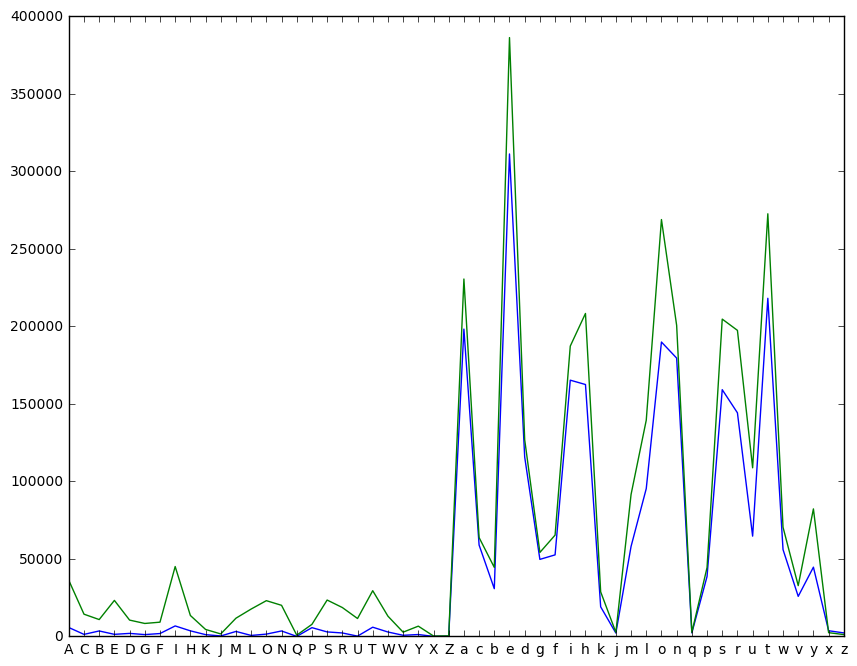

In [5]:
#plot the frequency statistics for characters
fr_stat = {}
fr_stat_2 = {}
chars = list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')
for c in chars:
    fr_stat[c] = fr[char_to_ix[c]]
    fr_stat_2[c] = fr_2[char_to_ix_2[c]]

plt.xticks(xrange(len(fr_stat)), fr_stat.keys())
plt.plot(xrange(len(fr_stat)), fr_stat.values())
plt.plot(xrange(len(fr_stat_2)), fr_stat_2.values())
plt.show()

#strong correlation shows that one of the texts can represent the other text.


In [35]:
#default text to work upon
t = list(open(filename, 'r').read()[100:200])

t1 = shuffle_text(t, 0, len(t))
print pretty_string(t), '\n',pretty_string(t1)

 if you don't tell me that this means war,
if you still try to defend the infamies and horrors per... 
oise ns twfemit  loaee dl ttfstn
hpiaiyre,hhetn as ydrhoeld tmy ui t f n oe ...


Entropy :  253.151905408 , Error :  -1 , Acceptance :  0.638569604087
lfondmen atif as iolfe
enly thte swhape, str thidiny hed t o urme in ty ofl ...
Entropy :  221.344001854 , Error :  -1 , Acceptance :  0.523889354568
Current state : or, oumarefor slad wn
t a ot'sss ferind irtheimntallly feithe, t psthe id y rounimy aton f heed t ...
Entropy :  244.54770357 , Error :  -1 , Acceptance :  0.44532321559
'toundiol ferssafows m, irily tone e f pr t, ira ay hat ly h t foer the tanu
ld thindome...
Entropy :  211.241378506 , Error :  -1 , Acceptance :  0.383729854183
Current state : asime prrun
e f llems an'store asifo, relofond wid thith myout it t, ore an sthethed idy anlf y t ...
Entropy :  242.385802371 , Error :  -1 , Acceptance :  0.346502747767
, a morerndid t athofl winitthet yerms, ulithe ty re a il ountinhe tor ssly me nded f op
...


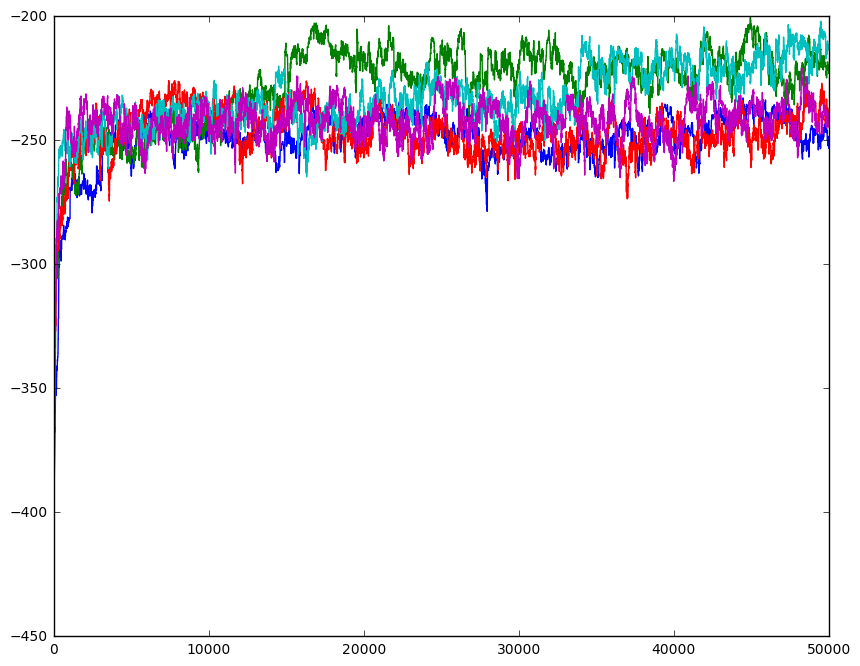

In [52]:
#time to run monte carlo
i = 2

while i < 7:
    initial_state = get_state(t1, tr, fr, char_to_ix, max_len=i)
    state, lps, _ = metropolis_hastings(initial_state, propose_a_move, compute_probability_of_state, 
                                      iters=50000, print_every=50000, tolerance=0.02, pretty_state=pretty_state)

    plt.plot(lps)
    i += 1

plt.show()